## DBSCAN (Denisity Based Special Clustering Of Application with Noise)

- K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.


- Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

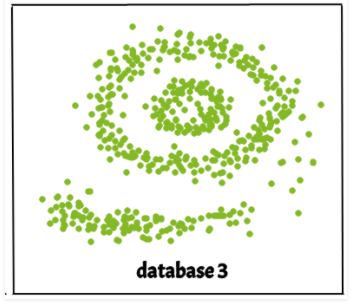

### DBSCAN algorithm requires two parameters 
**1.Epsilon (eps)** 
- It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors.
- One way to find the eps value is based on the k-distance graph.

**2.min_samples**
- The minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.
- For example dataset has 2 columns then min_samles = 2 + 1 = 3

### In this algorithm, we have 3 types of data points.
- **Core Point:** A point is a core point if it has more than MinPts points within eps.
- **Border Point:** A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- **Noise or outlier:** A point which is not a core point or border point.

 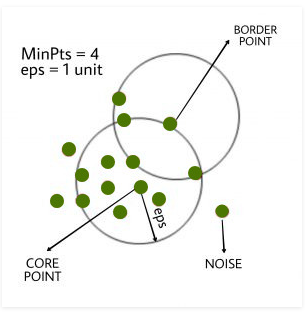
 
 ## Steps:
 1. Give Epsilon minimum points.
 2. Find out **core points**, **Border points**, and **Noise**.
 2. Connect the **core points** to form cluster.Repeat all steps until we get denisity based cluster.
 3. Assigns labels to cluster.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D:\Python\ML\Datasets\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre']) 
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# calculation of Epsilon

Text(0.5, 0, 'Distance')

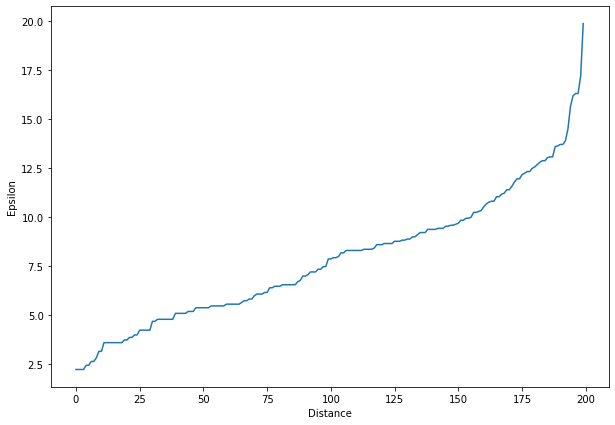

In [17]:
from sklearn.neighbors import NearestNeighbors
n = NearestNeighbors(n_neighbors=2)
n_fit = n.fit(df)
distance, index = n_fit.kneighbors(df)
distance = np.sort(distance,axis=0)
distance  = distance[:,1]
plt.figure(figsize = (10,7))
plt.plot(distance)
plt.ylabel("Epsilon")
plt.xlabel("Distance")

In [18]:
# eps  = 13 min-sample = 5+1 = 6

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
model  = DBSCAN(eps = 13,min_samples=6)
model.fit(df)
model.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  1, -1,  0, -1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  3, -1, -1,  2,  3, -1,  3,  2,
        3,  3, -1,  2,  2,  2,  2,  3,  2,  2, -1,  2,  2,  2, -1,  2,  2,
       -1,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2, -1,
        2,  2,  4, -1,  2, -1,  4,  2,  2,  2,  4,  2,  4,  2,  4,  4,  2,
        2,  4,  2,  4,  2,  2,  2,  2,  2,  5, -1,  4,  4,  5,  2, -1,  2,
       -1,  5, -1, -1, -1, -1,  6, -1, -1, -1,  6, -1,  6, -1,  6, -1,  6,
       -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  7, -1, -1,
       -1,  7, -1,  7, -1,  7, -1, -1, -1,  7, -1,  7, -1,  7, -1,  7, -1,
       -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Text(0, 0.5, 'Spending_Score')

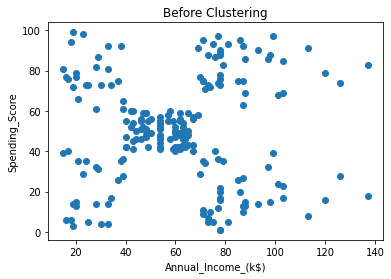

In [29]:
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'])
plt.title('Before Clustering')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')

Text(0, 0.5, 'Spending_Score')

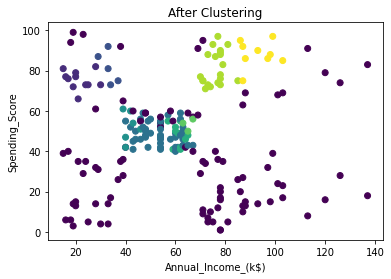

In [30]:
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c = model.labels_)
plt.title('After Clustering')

plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')